In [17]:
import numpy as np
import zoopt
import opensim as osim
from common import *
import matplotlib.pyplot as plt
import hyperobjects as ho

from scipy.spatial.transform import Rotation as Rot

[[0.         0.        ]
 [1.71822459 0.        ]]
[1.00000017 1.99999965]
[[0.70710678]
 [0.70710678]]


(-1.5, 1.5)

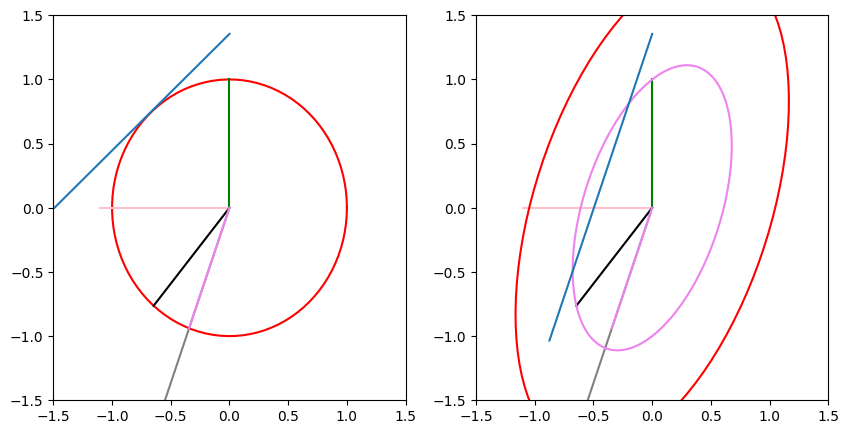

In [416]:
%matplotlib inline

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


S = ho.Sphere(2)
E = S #+ [0.5,0.5]
var = 1
(var*E).plot(ax1, color="red")

# http://mast.free.fr/Fiifo4RN_06/Math/MegaMaths/Espaces%20affines/ueaa0002xx.pdf
origin = np.array([0,1])
insertion1 = np.array([-1.1,0])
insertion2 = np.array([-1.1,-1.3])
insertion2 = insertion2 / np.linalg.norm(insertion2)

w1 = (insertion2 - origin)
w = (ho.AffineSpace(w1)).basis.ravel()
u = w/np.linalg.norm(w)
g = ho.AffineSpace(w).orthogonal_projection_matrix


ax1.plot([0, origin[0]], [0, origin[1]], c="green")
ax2.plot([0, origin[0]], [0, origin[1]], c="green")

ax1.plot([0, insertion1[0]], [0, insertion1[1]], c="pink")
ax2.plot([0, insertion1[0]], [0, insertion1[1]], c="pink")

ax1.plot([0, insertion2[0]], [0, insertion2[1]], c="black")
ax2.plot([0, insertion2[0]], [0, insertion2[1]], c="black")

ax1.plot([0, w1[0]], [0, w1[1]], c="gray")
ax2.plot([0, w1[0]], [0, w1[1]], c="gray")
ax1.plot([0, w[0]], [0, w[1]], c="violet")
ax2.plot([0, w[0]], [0, w[1]], c="violet")

sample_sphere = ho.sample_sphere(2, 200)
points = []

for x in sample_sphere.T:
    # ax2.scatter(*((x + (g@x))))
    points.append((x + (g@x)))
points = np.array(points).T
E2 = var * ho.Ellipsoid.lowner_john_outer_approximation(points)
# E2 = (1/E2.volume) * E.volume * E2
# E2 = np.max(E2.radii)*E2
I = E2 & ho.AffineSpace(origin)
print(I.embedded_sphere_transformation)
K = origin/np.linalg.norm(origin) * np.linalg.norm(I.embedded_sphere_transformation[:,0])
ax2.scatter(*K)
E2 = 1 * E2
print(E2.radii)
E2 = 1 * E2
E2.plot(ax2, color="red")
E3 = np.linalg.norm(origin)/np.linalg.norm(K)* E2
# E3 = 1/np.linalg.norm(np.cross([w1[0], w1[1], 0], [0,0,1])) * E2
E3.plot(ax2, color="violet")

p1 = np.array([-1,1])
p1 = p1/np.linalg.norm(p1)
p1_orth = ~ho.VectorSpace(p1) + p1
print(p1_orth.basis)

# ax1.scatter(*p1, c="blue")
# ax1.plot([0, p1_orth.basis.ravel()[0]], [0, p1_orth.basis.ravel()[1]], c="blue")
l = 1.355
ax1.plot([l*origin[0], l*insertion1[0]], [l*origin[1], l*insertion1[1]])

ax2.plot([l*origin[0], l*insertion2[0]], [l*origin[1], l*insertion2[1]])

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
ax2.set_xlim(-1.5,1.5)
ax2.set_ylim(-1.5,1.5)

adjusting_sphere_radius 0.9581296885077718
eval 0.6636263881489777 1.2982657279280307
[0.95812969 1.91625938]
f [0.6775 0.6775]
[[0.70710678]
 [0.70710678]]


(-2.0, 2.0)

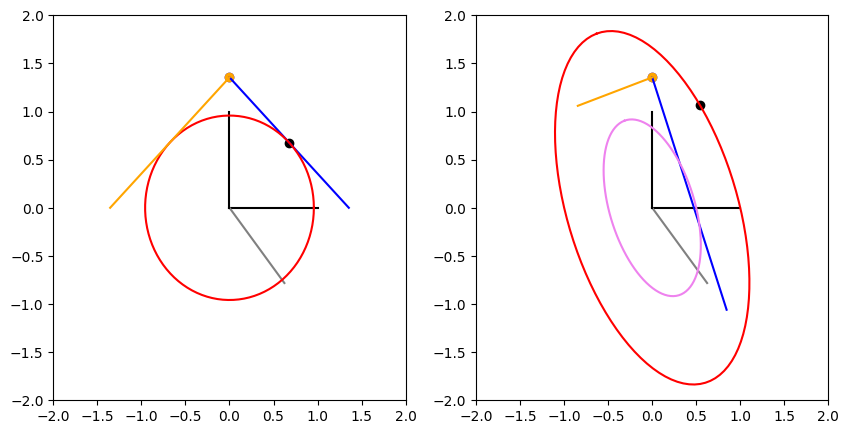

In [92]:
%matplotlib inline

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = np.array([1, 0])
y = np.array([0, 1])
q = -2*np.pi/7
R = np.array([
    [np.cos(q), -np.sin(q)],
    [np.sin(q), np.cos(q)]
])
x2 = R @ x

ax1.plot([0, x[0]], [0, x[1]], c="black")
ax1.plot([0, x2[0]], [0, x2[1]], c="gray")
ax1.plot([0, y[0]], [0, y[1]], c="black")
ax2.plot([0, x[0]], [0, x[1]], c="black")
ax2.plot([0, x2[0]], [0, x2[1]], c="gray")
ax2.plot([0, y[0]], [0, y[1]], c="black")

# http://mast.free.fr/Fiifo4RN_06/Math/MegaMaths/Espaces%20affines/ueaa0002xx.pdf
l = 1.355
O1 = l*y
I1_1 = l*x
I1_2 = l*x2
ax1.plot([O1[0], I1_1[0]], [O1[1], I1_1[1]], c="blue")
ax2.plot([O1[0], I1_2[0]], [O1[1], I1_2[1]], c="blue")
ax1.scatter(*O1, c="blue")
ax2.scatter(*O1, c="blue")
f = np.cross([*((I1_1 - O1)/np.linalg.norm(I1_1-O1)), 0], [*O1, 0])
adjusting_sphere_radius = np.linalg.norm(f)

print("adjusting_sphere_radius", adjusting_sphere_radius)

S = ho.Sphere(2)
E = S #+ [0.5,0.5]
var = adjusting_sphere_radius
(var*E).plot(ax1, color="red")

w1 = (I1_2 - O1)
w = (ho.AffineSpace(w1)).basis.ravel()
g = ho.AffineSpace(w1).orthogonal_projection_matrix

l = 1.355
O2 = l*y
I2_1 = -l*x
I2_2 = -l*x2
ax1.scatter(*O2, c="orange")
ax2.scatter(*O2, c="orange")
ax1.plot([O2[0], I2_1[0]], [O2[1], I2_1[1]], c="orange")
ax2.plot([O2[0], I2_2[0]], [O2[1], I2_2[1]], c="orange")

sample_sphere = ho.sample_sphere(2, 200)
points = []

E2 = var * ho.Ellipsoid(np.eye(2) + g)
print("eval", E2.eval(O1), np.linalg.norm(E2.embedded_sphere_transformation @ O1))
print(E2.radii)
E2.plot(ax2, color="red")

# E3 = (1 / np.max(E2.radii)) * E2
# ax2.scatter(*(E2.embedded_sphere_transformation @ O1))
ax2.scatter(*((np.eye(2) + g) @ (0.5*I1_1+0.5*O1)), c="black")
ax1.scatter(*(0.5*I1_1+0.5*O1), c="black")
print("f", 0.5*I1_1+0.5*O1)
test = I1_2 - O1
E3 = (0.5) * E2
E3.plot(ax2, color="violet")

p1 = np.array([-1,1])
p1 = p1/np.linalg.norm(p1)
p1_orth = ~ho.VectorSpace(p1) + p1
print(p1_orth.basis)

# ax1.scatter(*p1, c="blue")
# ax1.plot([0, p1_orth.basis.ravel()[0]], [0, p1_orth.basis.ravel()[1]], c="blue")

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)

In [95]:
import clifford as cf

In [102]:
G4, blades_g4 = cf.Cl(4) # instantiate a 4D- GA
G4c, blades_g4c, stuff = cf.conformalize(G4)

e1, e2, e3, e4 = blades_g4c["e1"], blades_g4c["e2"], blades_g4c["e3"], blades_g4c["e4"]
up, down = stuff["up"], stuff["down"]
no, ni = stuff["eo"], stuff["einf"]

c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [123]:
P = 1*e1 + 2*e2 + 3*e3 + 4*e4
v = (4*e1 + 1*e2 + 3*e3 + 5*e4).normal()

L = up(P) ^ v ^ ni
print(L)

LD = no ^ v ^ ni
LM = P ^ v ^ ni # A plane still!
print(LD + LM)

print( up(P) ^ up(P+v))
L2 = up(P) ^ up(P+v)
d = L2.normal()
print(up(P+1.5*v)^L)
print(d)

-(0.9802^e125) - (0.9802^e126) - (1.26025^e135) - (1.26025^e136) - (1.54031^e145) - (1.54031^e146) + (0.56011^e156) + (0.42008^e235) + (0.42008^e236) + (0.84017^e245) + (0.84017^e246) + (0.14003^e256) + (0.42008^e345) + (0.42008^e346) + (0.42008^e356) + (0.70014^e456)
-(0.9802^e125) - (0.9802^e126) - (1.26025^e135) - (1.26025^e136) - (1.54031^e145) - (1.54031^e146) + (0.56011^e156) + (0.42008^e235) + (0.42008^e236) + (0.84017^e245) + (0.84017^e246) + (0.14003^e256) + (0.42008^e345) + (0.42008^e346) + (0.42008^e356) + (0.70014^e456)
-(0.9802^e12) - (1.26025^e13) - (1.54031^e14) - (2.72064^e15) - (3.28076^e16) + (0.42008^e23) + (0.84017^e24) + (8.77155^e25) + (8.63153^e26) + (0.42008^e34) + (10.11172^e35) + (9.69164^e36) + (11.45189^e45) + (10.75175^e46) - (5.40098^e56)
0
-(1.96039^e12) - (2.5205^e13) - (3.08062^e14) - (5.44129^e15) - (6.56151^e16) + (0.84017^e23) + (1.68034^e24) + (17.54311^e25) + (17.26305^e26) + (0.84017^e34) + (20.22345^e35) + (19.38328^e36) + (22.90378^e45) + (21.50

In [128]:
print(LM)


-(0.9802^e125) - (0.9802^e126) - (1.26025^e135) - (1.26025^e136) - (1.54031^e145) - (1.54031^e146) + (0.42008^e235) + (0.42008^e236) + (0.84017^e245) + (0.84017^e246) + (0.42008^e345) + (0.42008^e346)


In [148]:
L = up(e1 + 2*e2 - 3*e3 + 4*e4)^(0.6*e1 + e2 +4*e3 + e4)^ni
M = (e1 + 2*e2 - 3*e3 + 4*e4) ^ (0.6*e1 + e2 +4*e3 + e4) ^ ni

w1 = e1
w2 = e2
z1 = w1^M.dual()
z2 = w2^M.dual()

t1 = (w1 | M)
print(t1)
print(z1)
# print(z2.dual())
# t = z1.dual().meet(z2.dual())

-(0.2^e25) - (0.2^e26) + (5.8^e35) + (5.8^e36) - (1.4^e45) - (1.4^e46)
(1.4^e1235) + (1.4^e1236) + (5.8^e1245) + (5.8^e1246) + (0.2^e1345) + (0.2^e1346)


In [150]:
import clifford as cf
import clifford.tools.g3c as g3c_tools
G3, blades_g3 = cf.Cl(3) # instantiate a 3D- GA
G3c, blades_g3c, stuff = cf.conformalize(G3)

e1, e2, e3 = blades_g3c["e1"], blades_g3c["e2"], blades_g3c["e3"]
up, down = stuff["up"], stuff["down"]
no, ni = stuff["eo"], stuff["einf"]

c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference

In [276]:
O = g3c_tools.random_conformal_point()
I = g3c_tools.random_conformal_point()
T1 = g3c_tools.random_rotation_translation_rotor()
T2 = g3c_tools.random_rotation_translation_rotor()
T3 = g3c_tools.random_rotation_translation_rotor()

I1 = g3c_tools.apply_rotor(I, T1)
I2 = g3c_tools.apply_rotor(I, T2)
I3 = g3c_tools.apply_rotor(I, T3)

L1 = O^I1^ni
L2 = O^I2^ni
L3 = O^I3^ni

print(O)
print(I1)
print(I2)
print(I3)
print(L1)
print(L2)
print(L3)


-(6.04885^e1) - (17.17091^e2) - (3.49729^e3) + (171.32986^e4) + (172.32986^e5)
(2.87151^e1) - (8.00361^e2) - (10.80429^e3) + (94.01798^e4) + (95.01798^e5)
-(21.62192^e1) - (4.27537^e2) + (15.90482^e3) + (368.87474^e4) + (369.87474^e5)
(8.54697^e1) - (4.53157^e2) - (28.32425^e3) + (447.4246^e4) + (448.4246^e5)
(97.71908^e124) + (97.71908^e125) + (75.396^e134) + (75.396^e135) + (8.92036^e145) + (157.52853^e234) + (157.52853^e235) + (9.1673^e245) - (7.307^e345)
-(345.40692^e124) - (345.40692^e125) - (171.82392^e134) - (171.82392^e135) - (15.57307^e145) - (288.05248^e234) - (288.05248^e235) + (12.89554^e245) + (19.40211^e345)
(174.17007^e124) + (174.17007^e125) + (201.22034^e134) + (201.22034^e135) + (14.59582^e145) + (470.50501^e234) + (470.50501^e235) + (12.63934^e245) - (24.82697^e345)


In [335]:

M1 = down(O)^(I1-O)^ni
M2 = down(O)^(I2-O)^ni
M3 = down(O)^(I3-O)^ni
print("M2", M2)

print("M1", M1)
print((no^ni | M1))

O_as_np = np.array([O|e1, O|e2, O|e3]).astype(float)
I1_as_np = np.array([I1|e1, I1|e2, I1|e3]).astype(float)
I2_as_np = np.array([I2|e1, I2|e2, I2|e3]).astype(float)
I3_as_np = np.array([I3|e1, I3|e2, I3|e3]).astype(float)
cp1 = np.cross(I1_as_np-O_as_np, O_as_np)
cp2 = np.cross(I2_as_np-O_as_np, O_as_np)
cp3 = np.cross(I3_as_np-O_as_np, O_as_np)
print(cp1, cp2)

w = e3
w_as_np = np.array([0,0,1])
g1 = w_as_np.dot(cp1)
g2 = w_as_np.dot(cp2)
g3 = w_as_np.dot(cp3)

print(g1, g2, g3)
print(M1)

g1 = (M1^w) | (no^e1^e2^e3)
g2 = (M2^w) | (no^e1^e2^e3)
g3 = (M3^w) | (no^e1^e2^e3)
g1 = (no^M1^w).dual()
g2 = (no^M2^w).dual()
g3 = (no^M3^w).dual()
g1p = M1^w # = g1.dual() | ni
g2p = M2^w # = g2.dual() | ni
g3p = M3^w # = g3.dual() | ni
print("h", g1, g2, g3)
print("t", g1.dual() | ni)
print(M1^w)
print(M1)
print((~T1) * (g1.dual() | ni) * T1)
print((~T2) * (g2.dual() | ni) * T2)
print((g1.dual()| ni))
print((M1-M2-M3)^w)
print((g1.dual() | ni) - (g2.dual() | ni) - (g3.dual() | ni))
# print("t", g3c_tools.apply_rotor(g1.dual() | ni, ~T1))

Cz = np.array([
    [0, -1,  0],
    [1,  0,  0],
    [0,  0,  0]
])
print(np.cross([1,2,3], [0,0,1]))
print(Cz @ np.array([1,2,3]))
print(g1p)
print(g1p.dual())
print("M1 =", M1)
print(Cz @ np.array([157.52853, 75.396, 97.71908]))

M2 -(345.40692^e124) - (345.40692^e125) - (171.82392^e134) - (171.82392^e135) - (288.05248^e234) - (288.05248^e235)
M1 (97.71908^e124) + (97.71908^e125) + (75.396^e134) + (75.396^e135) + (157.52853^e234) + (157.52853^e235)
0
[-157.5285336    75.39600245  -97.71908145] [ 288.05247612 -171.82392341  345.40692115]
-97.71908145454888 345.40692115208105 -174.1700742562191
(97.71908^e124) + (97.71908^e125) + (75.396^e134) + (75.396^e135) + (157.52853^e234) + (157.52853^e235)
h -97.71908 345.40692 -174.17007
t -(97.71908^e1234) - (97.71908^e1235)
-(97.71908^e1234) - (97.71908^e1235)
(97.71908^e124) + (97.71908^e125) + (75.396^e134) + (75.396^e135) + (157.52853^e234) + (157.52853^e235)
-(97.71908^e1234) - (97.71908^e1235)
(345.40692^e1234) + (345.40692^e1235)
-(97.71908^e1234) - (97.71908^e1235)
-(268.95593^e1234) - (268.95593^e1235) - (0.0^e2345)
-(268.95593^e1234) - (268.95593^e1235)
[ 2 -1  0]
[-2  1  0]
-(97.71908^e1234) - (97.71908^e1235)
(97.71908^e4) + (97.71908^e5)
M1 = (97.71908^e124)

In [351]:
q = np.pi / 4
A = np.array([
    [np.cos(q), -np.sin(q)],
    [np.sin(q), np.cos(q)]
])
print(A.T)
print(-A)
# A = A/np.linalg.norm(A, ord=2)
# print(np.linalg.det(A))

X = np.array([3,4])
Y = np.array([1,2])
print(Y.dot(A@X))
print(X.dot(A@Y))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
9.19238815542512
6.3639610306789285


In [254]:
print(1/np.linalg.norm(ok))

1.0000012172062376


In [197]:
1 / np.linalg.norm(insertion2 - origin)

0.541196100146197